In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
import matplotlib.mlab as mlab
%matplotlib inline

In [152]:
V = np.array([550,560,570,580,590,601,610,620,630,640,650,660,670,680,690,701,720,740,760,780,
              802,820,840,860,880,900])

In [153]:
Height = np.array([0,0,0,0,.64,1.1,1.63,2.25,2.81,3.02])

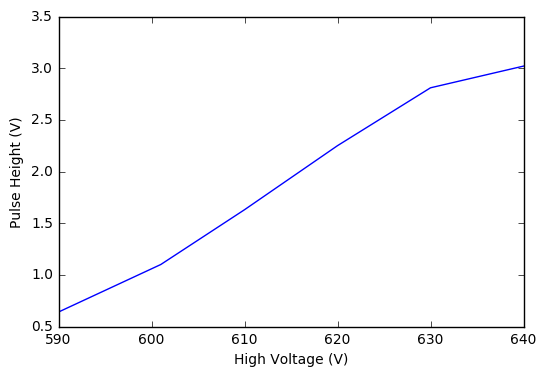

In [154]:
plt.plot(V[4:10],Height[4:10]);
plt.xlabel('High Voltage (V)');
plt.ylabel('Pulse Height (V)');

In [155]:
Counts = np.array([0,0,0,0,0,3046,3536,3941,4179,4322,
                   4489,4628,4807,4825,4963,4969,5158,5225,5403,5434,5581,5607,5711,5848,6013,6092])

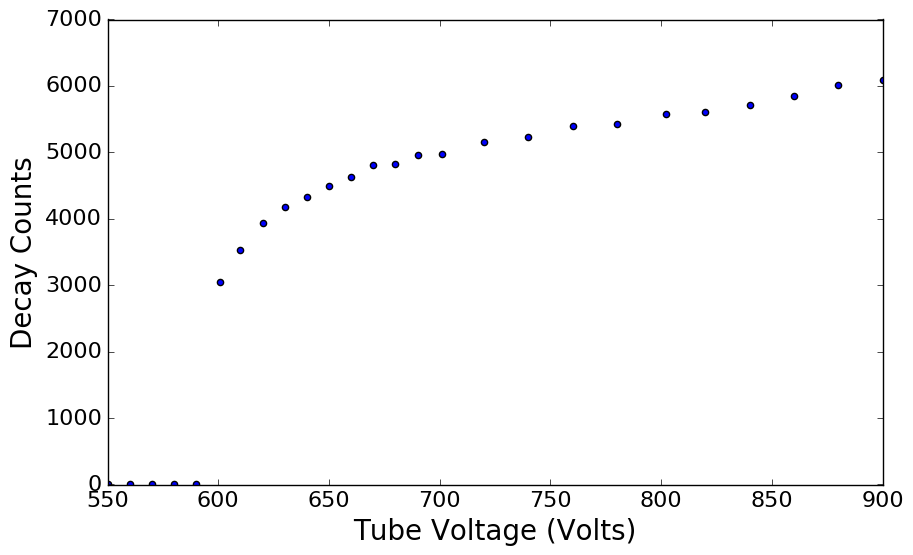

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(V,Counts);
plt.xlim(550,900);
plt.ylim(-1,7000)
plt.ylabel('Decay Counts',size=20);
plt.xlabel('Tube Voltage (Volts)',size=20);
plt.xticks(size = 16);
plt.yticks(size = 16);
plt.savefig('CountsVsVoltage')


### Part 3: High Count Rate

In [178]:
HighCounts = np.array([980,993,975,984,950,1023,1000,998,943,995,
                      995,1043,977,981,994,917,989,993,
                      938,967,976,937,969,939,906,
                      990,988,959,983,974])

In [179]:
Rates = np.array([entry/10 for entry in HighCounts]) #HighCounts measured for 10s
Rates

array([  98. ,   99.3,   97.5,   98.4,   95. ,  102.3,  100. ,   99.8,
         94.3,   99.5,   99.5,  104.3,   97.7,   98.1,   99.4,   91.7,
         98.9,   99.3,   93.8,   96.7,   97.6,   93.7,   96.9,   93.9,
         90.6,   99. ,   98.8,   95.9,   98.3,   97.4])

In [180]:
def correction(Rate):
    tau = 478*1e-6
    return 1/(1-Rate*tau)

In [181]:
TrueCounts = np.array([correction(entry)*entry*10 for entry in Rates])
TrueCounts

array([ 1028.16328072,  1042.48181641,  1022.66112157,  1032.56699513,
         995.19165296,  1075.59599899,  1050.19953791,  1047.99392122,
         987.51252193,  1044.68632637,  1044.68632637,  1097.72765114,
        1024.86165417,  1029.26404368,  1043.58401607,   959.03708911,
        1038.07412374,  1042.48181641,   982.03072228,  1013.86340251,
        1023.7613327 ,   980.93469152,  1016.06217084,   983.12686273,
         947.01206197,  1039.17588104,  1036.97247699,  1005.0727352 ,
        1031.46590087,  1021.56102076])

In [161]:
import numpy.ma as ma

In [183]:
N_best = np.mean(TrueCounts)
N_best

1022.9269717768555

In [184]:
sigma_th = np.sqrt(N_best)
sigma_th

31.983229539507974

In [185]:
sigma_exp = np.std(TrueCounts)
sigma_exp

31.699977938695824

In [188]:
len(ma.masked_outside(TrueCounts, N_best - 1*sigma_exp, N_best + 1*sigma_exp).compressed())

22

In [190]:
22/30

0.7333333333333333

In [189]:
len(ma.masked_outside(TrueCounts, N_best - 2*sigma_exp, N_best + 2*sigma_exp).compressed())

27

In [191]:
27/30

0.9

In [167]:
sigma_exp/sigma_th

0.9911437461166247

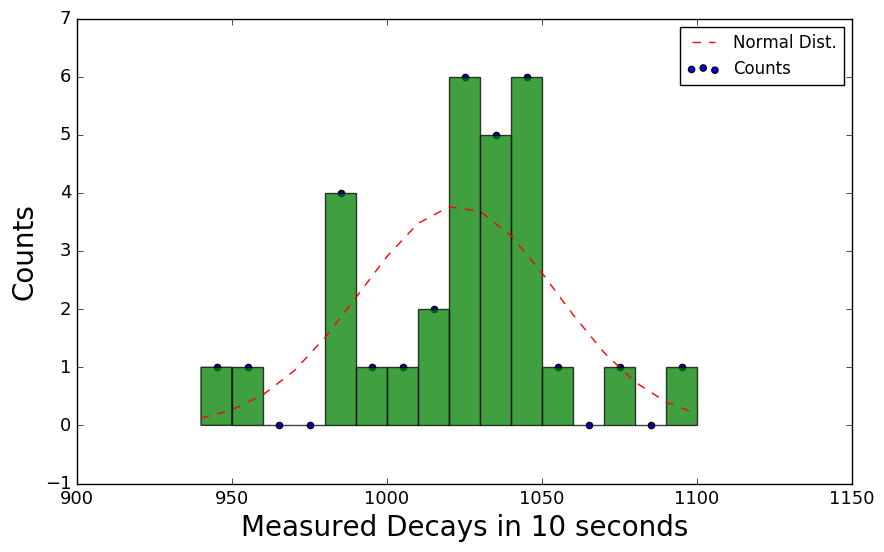

In [168]:
plt.figure(figsize=(10,6))
plt.xlabel('Measured Decays in 10 seconds',size=20);
plt.ylabel('Counts',size=20);
bins = np.arange(940,1110,10)
CountsPerBin = np.array([1,1,0,0,4,1,1,2,6,5,6,1,0,1,0,1])
MidBin = np.arange(945,1105,10)


n, bins, patches = plt.hist(TrueCounts, bins, normed=0, facecolor='green', alpha=0.75)
#plt.xlim(930,1110)
#plt.ylim(0,.03)

plt.scatter(MidBin,CountsPerBin)
mu = N_best
sigma = sigma_exp

y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y*300, 'r--', linewidth=1)

plt.xticks(size = 13);
plt.yticks(size = 13);

plt.legend(['Normal Dist.','Counts'],loc='best');
plt.savefig('HighCount.png')



### Low Count Rate

In [169]:
from scipy.special import factorial

In [170]:
def poisson(k,mu):
    return np.exp(-mu) * mu**k / factorial(k,0)

In [171]:
x = np.array([2,2,1,0,3,0,0,1,1,1,2,2,1,1,0,2,3,1,0,2,0,0,2,3,2,3,1,0,5,1,1,3,2,2,2,4,2,1,1,0,0,1,1,0,0,0,3,3,3,0])

In [172]:
mu2 = np.mean(x)

In [173]:
x2 = ma.masked_not_equal(x,2).compressed()
len(x2)

12

In [174]:
x5 = ma.masked_not_equal(x,5).compressed()
len(x5)

1

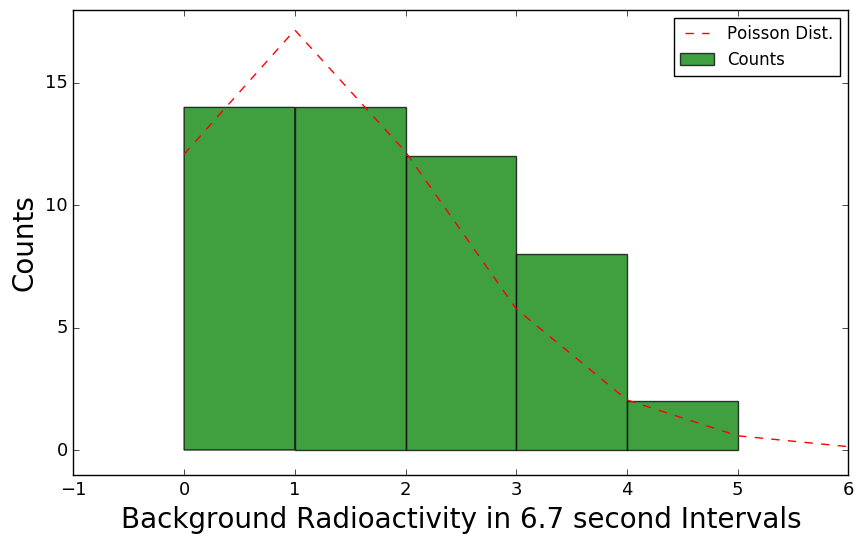

In [175]:
plt.figure(figsize=(10,6))

n, bins, patches = plt.hist(x, bins = 5,normed = 0, facecolor='green', alpha=0.75)
plt.xlim(-1,6);
plt.ylim(-1,18);

bins = [0,1,2,3,4,5,6]


y = poisson(bins, mu2)
l = plt.plot(bins, y*50, 'r--', linewidth=1)
plt.scatter


plt.legend(['Poisson Dist.','Counts'],loc='best');
plt.xlabel('Background Radioactivity in 6.7 second Intervals',size=20);
plt.ylabel('Counts',size=20);


plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('Background.png')

plt.xticks(size = 13);
plt.yticks(size = 13);

In [176]:
Nv = np.array([len(ma.masked_not_equal(x, i).compressed()) for i in [0,1,2,3,4,5]])

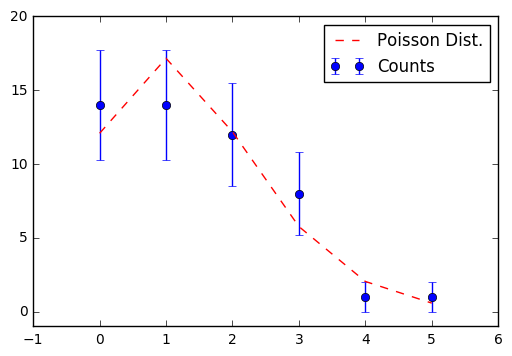

In [177]:
plt.errorbar([0,1,2,3,4,5], Nv, yerr=np.array([np.sqrt(entry) for entry in Nv]),fmt = 'o')

plt.xlim(-1,6);
plt.ylim(-1,20);

bins = [0,1,2,3,4,5]


y = poisson(bins, mu2)
l = plt.plot(bins, y*50, 'r--', linewidth=1)
plt.scatter


plt.legend(['Poisson Dist.','Counts'],loc='best');